<a href="https://colab.research.google.com/github/Nuelky/FE/blob/main/FE_GWP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Definition

Heteroskedasticity occurs in regression analysis when the variance of the errors in a regression model is not constant across observations (Knaub 2007). This means that there are periods of unstable variance.

This can be expressed as:

$$ \text{Var}(\epsilon_i) = \sigma_i^2 $$

where $$ \sigma_i^2 $$ varies across $$ i $$


### 2. Description

To better describe heteroskedasticity, it is a situation where the variability of the residuals (errors) is inconsistent over time across levels of an independent variable.  This means that, instead of the residual having a constant spread, their variance changes depending on the range of the independent variable. (Knaub, 2007). In ordinary least square regression, one of its important assumptions is constant variances of errors. When this assumption is violated, the model is unable to provide accurate and reliable estimates. This in turn affects hypothesis testing.


### 3. Demonstration

To demonstrate the challenges of heteroskedasticity, we will use simulated data where the errors variance is not constant. Here, the variance of the errors will increase as the independent variable increases. This data would give us insight on heteroskedasticity affects regression analysis and why it is important to detect and address it.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Simulating heteroskedastic data
np.random.seed(42)
n = 100
X = np.random.rand(n)
error = np.random.randn(n) * (1 + X * 10)  # Heteroskedastic errors
Y = 2 * X + 5 + error

data = pd.DataFrame({'X': X, 'Y': Y})
sm.add_constant(data['X'])

model = sm.OLS(data['Y'], sm.add_constant(data['X'])).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.1174
Date:                Mon, 09 Sep 2024   Prob (F-statistic):              0.733
Time:                        19:55:29   Log-Likelihood:                -314.78
No. Observations:                 100   AIC:                             633.6
Df Residuals:                      98   BIC:                             638.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2215      1.068      4.888      0.0

###4. Diagram

In the diagram displayed below, it shows the residual plot with a fan shaped pattern.  As the value of independent variable (X) increase, the spread of the residual also increases. This a clear visual of heteroskedasticity. Such a pattern shows that the variance of the residuals is not constant. This reaffirms the presence of heteroskedasticity in our model.

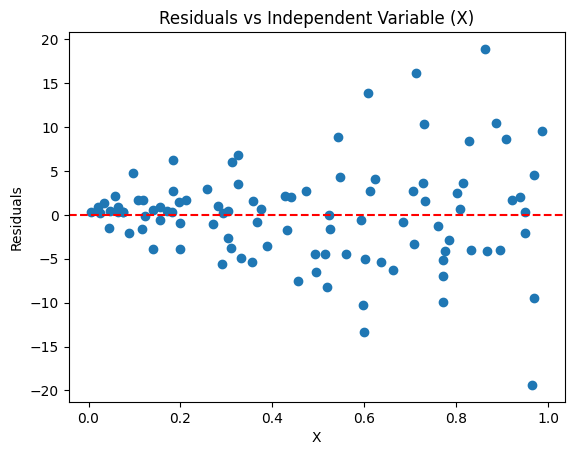

In [ ]:
plt.scatter(data['X'], model.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residuals vs Independent Variable (X)')
plt.show()


###5. Diagnosis

To test for heteroskedasticity, we use two standard techniques.
- Breusch-pagan Test
-	White Test
In our case, the Breusch-Pagan test has a p-value of 8.697e-05, while the White test showed a p-value of 0.00039. Both p-values are significantly below the common threshold of 0.05, which allows us to confidently reject the null hypothesis of constant variance. Therefore, we can confirm the presence of heteroskedasticity in our model, meaning the assumption of homoscedasticity has been violated.


In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan
test = het_breuschpagan(model.resid, sm.add_constant(data['X']))
print('Breusch-Pagan Test: p-value =', test[1])
from statsmodels.stats.diagnostic import het_white
white_test = het_white(model.resid, sm.add_constant(data['X']))
print('White Test: p-value =', white_test[1])


Breusch-Pagan Test: p-value = 8.69724629502835e-05
White Test: p-value = 0.0003855293211346286


###6. Damage

It is important to know that heteroskedasticity compromises the efficiency of OLS estimates. This inefficiency leads to unreliable standard errors and confidence intervals. This could inflate or deflate the significance of predictor variables causing misleading inference. As a result, our hypothesis testing may become invalid and the model’s ability is compromised. This damage makes it very important to detect and correct heteroskedasticity and avoid inaccurate conclusions.

###7. Directions

To address the issue of models with heteroskedasticity, we will use WLS, GLS and robust standard errors. These methods are designed to account for the varying error variances, ensuring that the estimates produced by the model are reliable and valid (Knaub 2007). Below is a brief explanation of how each method works:
-	Weighted Least Squares (WLS): This method is useful when the variance of the errors is related to one or more independent variables. WLS assigns weights to each observation, with the goal of stabilizing the variance. Observations with larger error variance get smaller weights, while those with smaller error variance receive more weight. This adjustment allows the model to handle non-constant variance and produce efficient estimates.
-	Robust Standard Errors: In this approach, we do not modify the model itself, but instead adjust the standard errors to account for heteroskedasticity. This method corrects for the inconsistencies in error variance while maintaining the structure of the original model. Also, it allows for valid hypothesis testing and confidence intervals, even when the assumption of homoscedasticity is violated.
-	Generalized Least Squares (GLS): GLS is an advanced method that directly models the variance of the errors. It estimates the structure of the heteroskedasticity and adjusts the model accordingly. By doing this, GLS improves the efficiency of the regression estimates, providing a more accurate and reliable fit for models with heteroskedastic errors.
These methods are necessary in addressing the issue of non-constant variance in regression models. This ensures that our estimates remain valid and that the conclusions drawn from the analysis make sense.


In [ ]:
weights = 1 / (data['X']**2)  # Example of weights inversely proportional to X
wls_model = sm.WLS(data['Y'], sm.add_constant(data['X']), weights=weights).fit()
print(wls_model.summary())


                            WLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.000
Model:                            WLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                   0.01025
Date:                Mon, 09 Sep 2024   Prob (F-statistic):              0.920
Time:                        19:59:54   Log-Likelihood:                -293.17
No. Observations:                 100   AIC:                             590.3
Df Residuals:                      98   BIC:                             595.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6083      0.072     77.836      0.0

- Robust Standard Errors: Use robust standard errors to adjust for heteroskedasticity without changing the model.

In [ ]:
robust_model = model.get_robustcov_results()
print(robust_model.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                   0.09910
Date:                Mon, 09 Sep 2024   Prob (F-statistic):              0.754
Time:                        20:00:29   Log-Likelihood:                -314.78
No. Observations:                 100   AIC:                             633.6
Df Residuals:                      98   BIC:                             638.8
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2215      0.690      7.567      0.0

- Generalized Least Squares (GLS): GLS corrects for heteroskedasticity by modeling the variance of the errors.

In [ ]:
gls_model = sm.GLS(data['Y'], sm.add_constant(data['X'])).fit()
print(gls_model.summary())


                            GLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.001
Model:                            GLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.1174
Date:                Mon, 09 Sep 2024   Prob (F-statistic):              0.733
Time:                        20:01:00   Log-Likelihood:                -314.78
No. Observations:                 100   AIC:                             633.6
Df Residuals:                      98   BIC:                             638.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2215      1.068      4.888      0.0

### References

Knaub, James (2007). *Heteroscedasticity and Homoscedasticity*. Vol 2, pp. 431-432. [https://doi.org/10.4135/9781412952644.n201](https://doi.org/10.4135/9781412952644.n201)
